In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 
from sklearn import metrics

In [5]:
#Loading the data from excel to pandas 
cars_data = pd.read_excel("/Users/ataberkcinetci/Desktop/ProjectX/Data/asg1_traindata.xlsx")

In [6]:
#inspecting first 5 datas
cars_data.head()

,Price,Year,Type,Shift,km,Power,Engine,Seller
0,24900,2004,Diesel,Manual,270000,70,1248,Dealer
1,27500,2004,Gasoline,Manual,164000,75,1199,Dealer
2,42500,2008,Diesel,Auto,300000,90,1248,Dealer
3,63750,2017,Gasoline,Auto,8780,90,1398,Dealer
4,25000,2004,Diesel,Manual,200000,70,1248,Owner


In [7]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   2900 non-null   int64 
 1   Year    2900 non-null   int64 
 2   Type    2900 non-null   object
 3   Shift   2900 non-null   object
 4   km      2900 non-null   int64 
 5   Power   2900 non-null   int64 
 6   Engine  2900 non-null   int64 
 7   Seller  2900 non-null   object
dtypes: int64(5), object(3)
memory usage: 181.4+ KB


In [44]:
#Getting how many rows and columns information 
cars_data.shape

(2900, 8)

In [9]:
#Checking the number of missing values
cars_data.isnull().sum()

Price     0
Year      0
Type      0
Shift     0
km        0
Power     0
Engine    0
Seller    0
dtype: int64

In [10]:
#checking the distrubition of categorical data 
print(cars_data.Type.value_counts())
print(cars_data.Shift.value_counts())
print(cars_data.Seller.value_counts())

Gasoline    1133
Diesel      1113
LPG          654
Name: Type, dtype: int64
Manual    1951
Auto       949
Name: Shift, dtype: int64
Owner     1635
Dealer    1265
Name: Seller, dtype: int64


# Encoding the categorical datas 

In [11]:
#encoding "Type"
cars_data.replace({"Type":{"Gasoline": 0,"Diesel":1, "LPG": 2}},inplace = True)

In [12]:
#encoding "Shift"
cars_data.replace({"Shift":{"Manual": 0,"Auto":1}},inplace=True)

In [13]:
#Encoding "Seller"
cars_data.replace({"Seller":{"Owner": 0,"Dealer":1}},inplace=True)

In [14]:
#Splitting data in to 2 parts: DATA and TARGET
X=cars_data.drop(["Price"],axis=1)
Y=cars_data["Price"]

In [15]:
# Splitting data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,) 

# Model Training

In [16]:
#Linear Regression Model

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(X_train,Y_train)

LinearRegression()

In [49]:
train_data_prediction = lr.predict(X_train)

In [50]:
# r^2 error for train
error_score = metrics.r2_score(Y_train, train_data_prediction)
print("r^2 error:", error_score)

r^2 error: 0.8615779140975499


In [51]:
# r^2 error for test data
test_data_prediction = lr.predict(X_test)
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("r^2 error:", error_score)

r^2 error: 0.8986388768555731


# Visualize the actual ad predicted prices

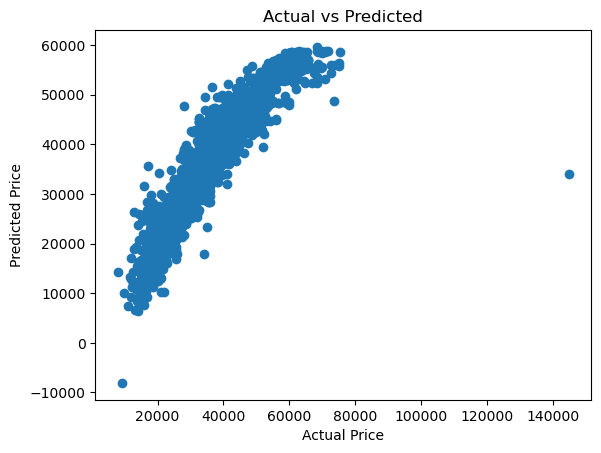

In [52]:
plt.scatter(Y_train, train_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()

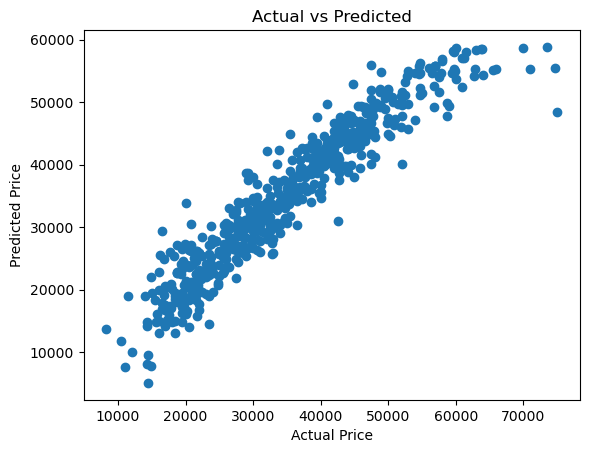

In [53]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()

# 94 Car prices

In [24]:
new_data = pd.read_excel("/Users/ataberkcinetci/Desktop/ProjectX/Data/asg1_testdata_without_prices.xlsx")

In [54]:
new_data

,Year,Type,Shift,km,Power,Engine,Seller
0,2013,1,0,60000,75,1248,0
1,2004,0,0,108000,80,1229,1
2,2005,0,0,134500,80,1229,0
3,2000,2,0,200000,90,1389,1
4,2003,1,0,168000,51,1601,0
...,...,...,...,...,...,...,...
89,2004,1,0,202000,70,1248,0
90,2012,0,1,70000,85,1229,1
91,2012,0,1,27000,100,1364,0
92,1997,2,0,186000,90,1389,1


# Encoding new data

In [55]:
#encoding "Type"
new_data.replace({"Type":{"Gasoline": 0,"Diesel":1, "LPG": 2}},inplace = True)

In [56]:
#encoding "Shift"
new_data.replace({"Shift":{"Manual": 0,"Auto":1}},inplace=True)

In [33]:
#Encoding "Seller"
new_data.replace({"Seller":{"Owner": 0,"Dealer":1}},inplace=True)

In [57]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    94 non-null     int64
 1   Type    94 non-null     int64
 2   Shift   94 non-null     int64
 3   km      94 non-null     int64
 4   Power   94 non-null     int64
 5   Engine  94 non-null     int64
 6   Seller  94 non-null     int64
dtypes: int64(7)
memory usage: 5.3 KB


In [58]:
new_data.head()

,Year,Type,Shift,km,Power,Engine,Seller
0,2013,1,0,60000,75,1248,0
1,2004,0,0,108000,80,1229,1
2,2005,0,0,134500,80,1229,0
3,2000,2,0,200000,90,1389,1
4,2003,1,0,168000,51,1601,0


In [59]:
prices = lr.predict(new_data)

In [60]:
prices

array([45109.03281689, 28514.25030721, 29083.09582709, 20625.745337  ,
       27480.08919917, 48174.98913484, 40509.39045061, 29956.85106832,
       42297.12932921, 18638.37488711, 50263.5557665 , 18868.60214139,
       47541.63645881, 37262.96137409, 29001.6567326 , 37368.78268191,
       39032.69973011, 30659.3243684 , 29426.22225408, 53672.10586044,
       51806.76092369, 22666.37234845, 20146.6326577 , 50455.67337894,
       19158.1145037 ,  7735.45386058, 48481.69116143, 29446.61623986,
       15920.0631271 , 20659.46326581, 23714.14993149, 47852.39046693,
       24765.13739325, 50513.26345757, 42163.34743144, 26289.96296754,
       55420.593625  , 36018.45475502, 44018.96428636, 21538.50442911,
       24991.32699935, 28413.84597813, 37838.4149553 , 15618.9820701 ,
       47275.85871628, 49891.43156922, 17971.38555953, 42879.20174528,
       25134.17898389, 27232.31568686, 48753.96101433, 52969.16129442,
       26676.31129478, 43778.15516931, 25796.63479601, 30693.10550931,
      